In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import iso_forest as iso
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()

/Users/Matias/Dropbox/GitHub/iso_forest/iso_forest.py:11: UserWarning: No igraph interface for plotting trees
  warnings.warn("No igraph interface for plotting trees")


## Create fake data

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


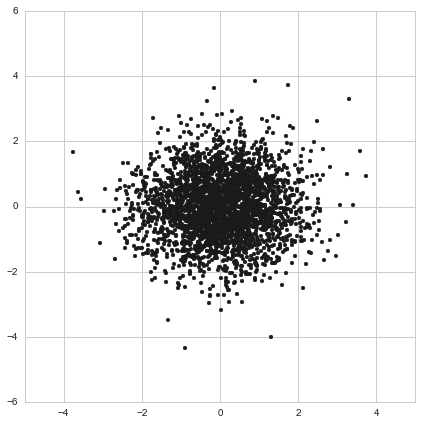

In [2]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 3000
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
plt.figure(figsize=(7,7))
plt.scatter(x,y,s=15,facecolor='k',edgecolor='k')

## Create Forest

In [3]:
F = iso.iForest(X,ntrees=500, sample_size=256)

## Computing path for All objects

In [4]:
S=F.compute_paths(X_in=X)

### Plotting anomaly distribution

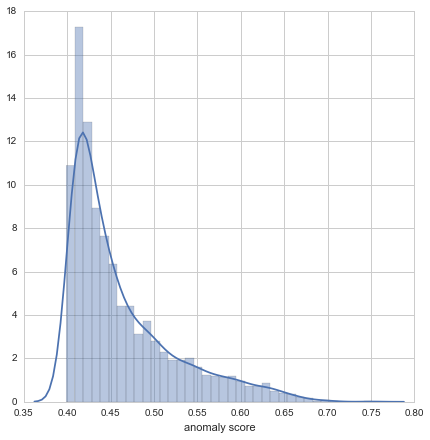

In [5]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sb.distplot(S, kde=True, color="b", ax=axes, axlabel='anomaly score')

## sorting by anomaly, plotting 10 top (non) anomalies in black (red)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


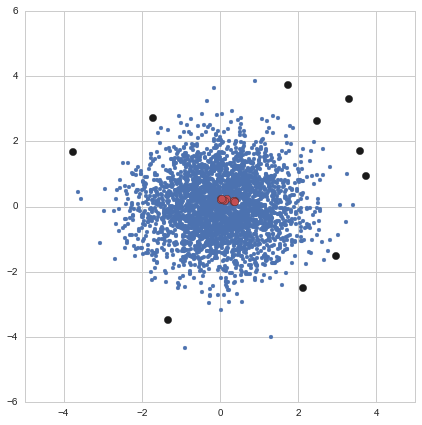

In [6]:
ss=np.argsort(S)
plt.figure(figsize=(7,7))
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss[-10:]],y[ss[-10:]],s=55,c='k')
plt.scatter(x[ss[:10]],y[ss[:10]],s=55,c='r')

## Another example, sin function with gaussian error

In [7]:
N = 4000
x2 = np.random.rand(N)
y2 = np.sin(x2*10.) + np.random.randn(N)/2.

## Add outliers by hand

(0, 1)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


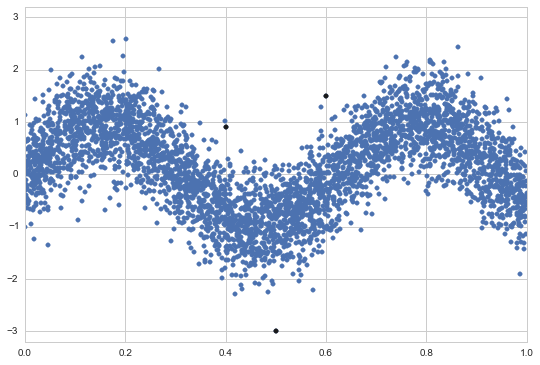

In [8]:
x2[0]=0.4; y2[0]=0.9
x2[1]=0.6; y2[1]=1.5
x2[2]=0.5; y2[2]=-3.
X2=np.array([x2,y2]).T
plt.figure(figsize=(9,6))
plt.scatter(x2,y2,c='b',edgecolor='b')
plt.scatter(x2[:3],y2[:3],c='k')
plt.ylim(-3.2,3.2)
plt.xlim(0,1)

In [9]:
F2 = iso.iForest(X2,ntrees=500, sample_size=512)

In [10]:
S2=F2.compute_paths(X_in=X2)

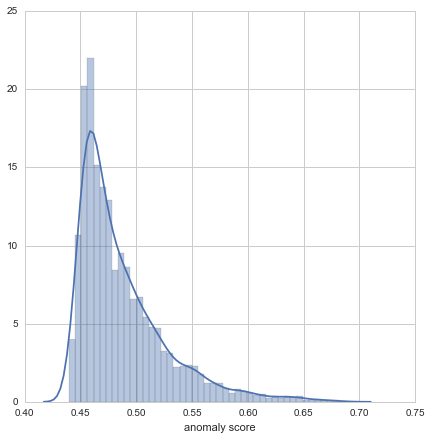

In [11]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sb.distplot(S2, kde=True, color="b", ax=axes, axlabel='anomaly score')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


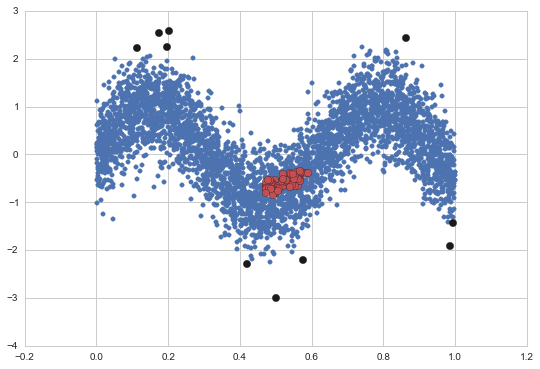

In [12]:
ss=np.argsort(S2)
plt.figure(figsize=(9,6))
plt.scatter(x2,y2,c='b',edgecolors='b')
plt.scatter(x2[ss[-10:]],y2[ss[-10:]],s=55,c='k')
plt.scatter(x2[ss[:100]],y2[ss[:100]],s=55,c='r')